In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
pd.set_option("display.max_columns", 50)

In [2]:
# Making dataframe from clean data
df = pd.read_csv("../../clean_data/clean_victimization_data.csv")
df.head()

,Year,Weight,Sex,Race,Hispanic origin,Race/Hispanic origin,Age,Marital status,Household income,Population size,Region,Location of residence,Victim-offender relationship,Reporting to the police,Presence of Weapon,Weapon category,Aggregate type of crime,Type of crime,Violent crime excluding simple assault,Injury,Medical treatment for physical injuries,Victim services,Location of incident
0,1995,3463.13071,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Never married,"50,000 to 74,999","250,000 to 499,999",West,Urban,Stranger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Robbery,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
1,1995,2497.65395,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Married,"50,000 to 74,999","Under 100,000",Midwest,Suburban,Stranger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
2,1995,2521.20834,Female,Black,Non-Hispanic,Non-Hispanic black,25 to 34,Never married,"50,000 to 74,999","Under 100,000",Midwest,Suburban,Stranger,"Yes, reported to the police","Yes, offender had weapon",Knife,Violent victimization,Aggravated assault,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"At or near friend, neighbor, or relative's home"
3,1995,2023.97373,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"25,000 to 34,999",Not a place,South,Suburban,Stranger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
4,1995,12143.84238,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"25,000 to 34,999",Not a place,South,Suburban,Stranger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."


In [3]:
df['Household income'].value_counts()

Unknown             7339
75,000 or more      6874
50,000 to 74,999    5750
35,000 to 49,999    5738
15,000 to 24,999    5465
25,000 to 34,999    5091
7,500 to 14,999     4773
Less than 7,500     3675
Name: Household income, dtype: int64

In [4]:
# Empty dataframe for the income by age to be put in
graph_df = pd.DataFrame()

# For loop running through each unique age value and adding it to graph_df
for age in df['Age'].unique():
    print(age)
    age_df = df[df['Age'] == f"{age}"]
    age_series = age_df['Household income'].value_counts()
    by_income = age_series.to_frame().reset_index()
    by_income.rename(columns={by_income.columns[1]:f"{age}"}, inplace=True)
    
    if graph_df.empty:
        graph_df = by_income
    else:
        graph_df = graph_df.merge(by_income, on='index')

graph_df

25 to 34
35 to 49
18 to 20
12 to 14
21 to 24
50 to 64
15 to 17
65 or older


,index,25 to 34,35 to 49,18 to 20,12 to 14,21 to 24,50 to 64,15 to 17,65 or older
0,Unknown,1511,1821,631,559,734,1158,543,382
1,"35,000 to 49,999",1340,1521,371,644,491,645,548,178
2,"50,000 to 74,999",1240,1559,382,631,400,814,607,117
3,"15,000 to 24,999",1240,1214,497,551,627,587,497,252
4,"25,000 to 34,999",1183,1197,416,537,577,520,487,174
5,"75,000 or more",1140,2014,467,732,444,1244,652,181
6,"7,500 to 14,999",908,1147,457,424,579,643,358,257
7,"Less than 7,500",741,737,705,207,505,461,205,114


In [5]:
# Sorting rows and columns
graph_df.rename(columns={'index':'Household income'}, inplace=True)
graph_df['order'] = [0, 5, 6, 3, 4, 7, 2, 1]
graph_df.sort_values('order', inplace=True)
graph_df.reset_index(inplace=True)
graph_df.drop('index', axis=1, inplace=True)
graph_df.drop('order', axis=1, inplace=True)
graph_df = graph_df[['Household income', '12 to 14', '15 to 17', '18 to 20', '21 to 24', '25 to 34', '35 to 49', '50 to 64', '65 or older']]
graph_df

,Household income,12 to 14,15 to 17,18 to 20,21 to 24,25 to 34,35 to 49,50 to 64,65 or older
0,Unknown,559,543,631,734,1511,1821,1158,382
1,"Less than 7,500",207,205,705,505,741,737,461,114
2,"7,500 to 14,999",424,358,457,579,908,1147,643,257
3,"15,000 to 24,999",551,497,497,627,1240,1214,587,252
4,"25,000 to 34,999",537,487,416,577,1183,1197,520,174
5,"35,000 to 49,999",644,548,371,491,1340,1521,645,178
6,"50,000 to 74,999",631,607,382,400,1240,1559,814,117
7,"75,000 or more",732,652,467,444,1140,2014,1244,181


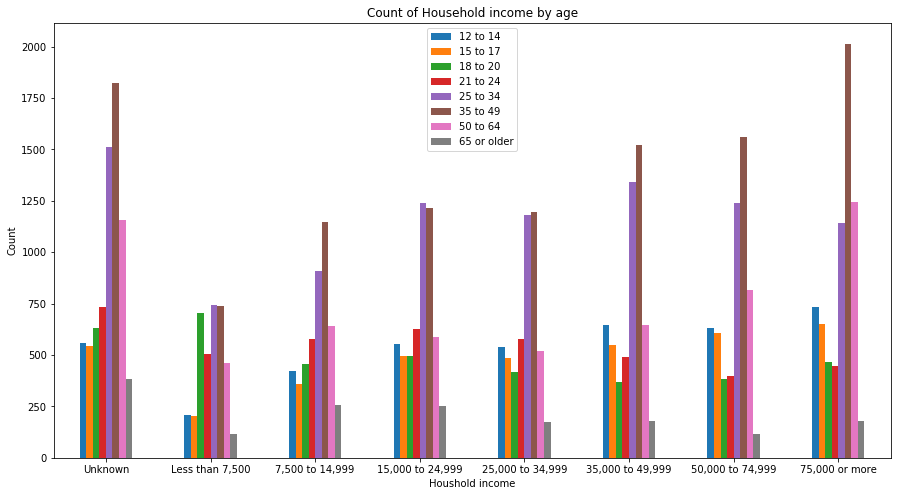

In [6]:
# Making and labeling graph
income_by_age = graph_df.plot(kind='bar', figsize=(15,8))
income_by_age.set_xticklabels(graph_df['Household income'], rotation=0)
income_by_age.set_title('Count of Household income by age')
income_by_age.set_xlabel('Houshold income')
income_by_age.set_ylabel('Count')
income_by_age
plt.savefig('household_income_by_age')
plt.show()